In [25]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
class KMeans():    
    def __init__(self,image, K, max_iters, plot_steps=False):
        ch = image.shape[2]
        c=image.shape[0]
        r=image.shape[1]
        pixel_values = image.reshape(c*r,ch)
        pixel_values = np.float32(pixel_values)
        self.pixel_values = image.reshape(c*r,ch)
        self.pixel_values = np.float32(pixel_values)
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []    
        self.y_pred = self.predict(self.pixel_values) 
        self.cent()
        self.centers = np.uint8(self.cent())
        self.y_pred = self.y_pred.astype(int)
        np.unique(self.y_pred)
        labels = self.y_pred.flatten()
        segmented_image = self.centers[labels.flatten()]
        segmented_image = segmented_image.reshape(image.shape)
        plt.imshow(segmented_image)
        plt.show()

    def predict(self, X):
            self.X = X
            self.n_samples, self.n_features = X.shape

            # initialize 
            random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
            self.centroids = [self.X[idx] for idx in random_sample_idxs]        # Optimize clusters
            for _ in range(self.max_iters):
                # Assign samples to closest centroids (create clusters)
                self.clusters = self._create_clusters(self.centroids)
                if self.plot_steps:
                    self.plot()            # Calculate new centroids from the clusters
                centroids_old = self.centroids
                self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
                if self._is_converged(centroids_old, self.centroids):
                    break            
                if self.plot_steps:
                    self.plot()        # Classify samples as the index of their clusters
            return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)        
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels    
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters    
    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index    
    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids    
    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))        
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)        
            for point in self.centroids:
                ax.scatter(*point, marker="x", color='black', linewidth=2)        
                plt.show()
    def cent(self):
        return self.centroids


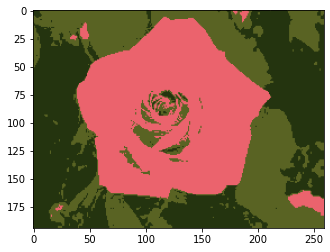

In [26]:
KMeans(image,K=3, max_iters=100)  

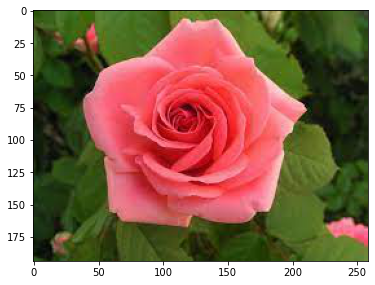

In [4]:
image = plt.imread(r'D:\1 er master\SE2\tivo\index.jpg')
#image=rgb_togray(image.copy()) 
plt.figure(figsize=(6, 6))
plt.imshow(image)